Равновесие Нэша в чистых стратегиях:
[[ 9  2  3  6  7  7]
 [ 4  6  7  5  9  5]
 [ 5  6 11  2  9  4]
 [ 8  4  3  3  7  9]
 [ 8  7 10  8  7  8]
 [ 9  5  6  7  8 10]]
V = 7
P = 0 0 0 0 1 0
Q = 0 1 0 0 0 0


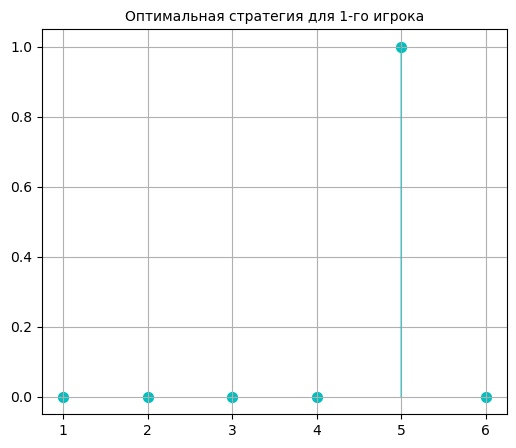

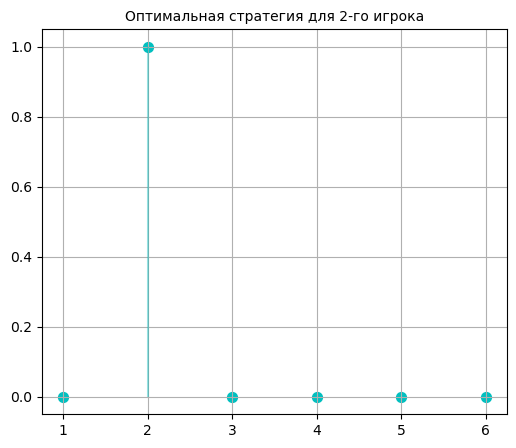

Спектр оптимальной стратегии неполон
[[-1 -2  3]
 [ 2  4  1]]
V = 7/5
P = 1/5 4/5
Q = 2/5 0 3/5


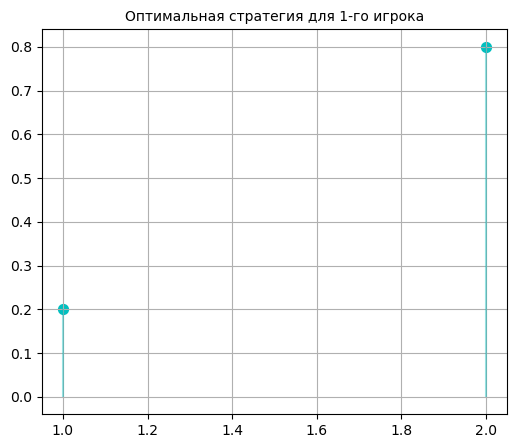

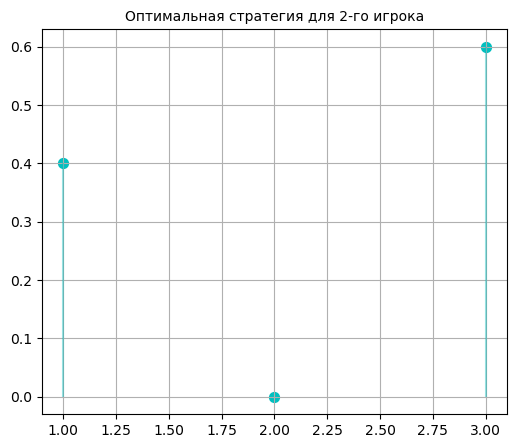

Спектр оптимальной стратегии полон
[[4 2 2]
 [2 5 0]
 [0 2 5]]
V = 88/35
P = 19/35 6/35 2/7
Q = 9/35 2/5 12/35


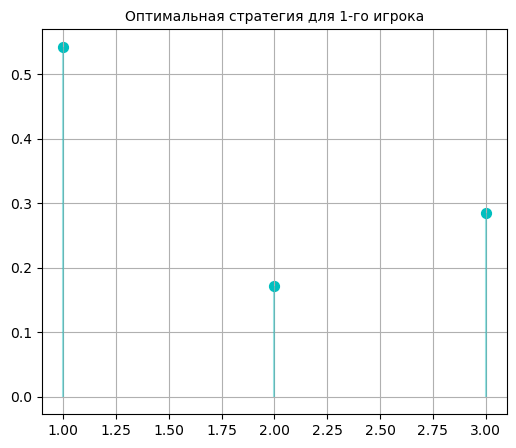

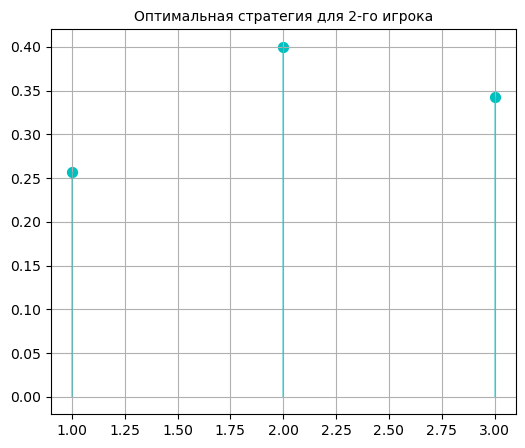

In [130]:
import numpy as np
from fractions import Fraction
from scipy.optimize import linprog
import matplotlib.pyplot as plt

def nash_equilibrium(X: np.ndarray):   
    M = X.shape[0]
    N = X.shape[1]
    I_N = np.ones((1, N)) 
    I_M = np.ones((1, M))
    
    minim = np.amin(X)
    V_shift = 0
    if minim < 0:
        X -= minim
        V_shift = minim
    
    res1 = linprog(I_M, A_ub = - X.T, b_ub = -I_N, method = "highs")  
    res2 = linprog(-I_N, A_ub = X, b_ub = I_M, method = "highs") 
    V = 1 / res1.fun
    P = V * res1.x
    Q = V * res2.x
    V += V_shift
    
    print("V =", Fraction(V).limit_denominator(1000))
    
    print("P =", end = ' ')
    for i in range(len(P) - 1):
        print(Fraction(P[i]).limit_denominator(1000), end = ' ')
    print(Fraction(P[len(P) - 1]).limit_denominator(1000))
    
    print("Q =", end = ' ')
    for i in range(len(Q) - 1):
        print(Fraction(Q[i]).limit_denominator(1000), end = ' ')
    print(Fraction(Q[len(Q) - 1]).limit_denominator(1000))
    
    x_vals = [x for x in range(1, len(P) + 1)] 
    y_vals = P
    plt.figure(figsize = (6, 5))
    plt.title("Оптимальная стратегия для 1-го игрока", fontsize = 10)
    plt.grid(True)
    plt.vlines(x_vals, ymin = 0, ymax = y_vals, color = "c", alpha = 0.4, linewidth = 1.5)
    plt.scatter(x_vals, y_vals, marker = '.', s = 200, c = "c", alpha = 1)
    plt.show()
    
    x_vals = [x for x in range(1, len(Q) + 1)]
    y_vals = Q
    plt.figure(figsize = (6, 5))
    plt.title("Оптимальная стратегия для 2-го игрока", fontsize = 10)
    plt.grid(True)
    plt.vlines(x_vals, ymin = 0, ymax = y_vals, color = "c", alpha = 0.4, linewidth = 1.5)
    plt.scatter(x_vals, y_vals, marker = '.', s = 200, c = "c", alpha = 1)
    plt.show()
    return
    

a = np.array([[9,2,3,6,7,7],[4,6,7,5,9,5],[5,6,11,2,9,4],[8,4,3,3,7,9],[8,7,10,8,7,8],[9,5,6,7,8,10]])
b = np.array([[3, 3, 6, 8], [9, 10, 4, 2], [7, 7, 5, 4]])
c = np.array([[4, 2, 2], [2, 5, 0], [0, 2, 5]])
b = np.array([[-1, -2, 3], [2, 4, 1]])
# b = np.array([[4, 0, 6, 2, 2, 1], [3, 8, 4, 10, 4, 4], [1, 2, 6, 5, 0, 0], [6, 6, 4, 4, 10, 3], [10, 4, 6, 4, 0, 9], [10, 7, 0, 7, 9, 8]])
# a = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
# a = np.array([[3, 1, 5], [1, 3, 3], [2, 2, 1]])

print("Равновесие Нэша в чистых стратегиях:")
print(a)
nash_equilibrium(a)
print("Спектр оптимальной стратегии неполон")
print(b)
nash_equilibrium(b)
print("Спектр оптимальной стратегии полон")
print(c)
nash_equilibrium(c)